In [1]:
!nvidia-smi

Wed Apr  7 19:02:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.39       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Graphics Device     Off  | 00000000:26:00.0  On |                  N/A |
| 57%   51C    P2    42W / 170W |   9929MiB / 12045MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session =tf.compat.v1.InteractiveSession(config=config)
gpu = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

In [3]:
# !unzip ./data.zip

# Become one with the data

In [4]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
paths_walkthrough = ['car_data']
for path_walkthrough in paths_walkthrough:
  print('\n'*5)
  print('*-*'*50)
  print(path_walkthrough)
  print('*-*'*50)
  print('\n'*5)
  for (root,dirs,files) in os.walk(path_walkthrough): 
    print('-'*50)
    print(f'Root : {root}')
    print(f'Dirs : {dirs}')
    print(f'No of Imgs : {len(files)}')
    print('-'*50)







*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
car_data
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*






--------------------------------------------------
Root : car_data
Dirs : ['car_data']
No of Imgs : 0
--------------------------------------------------
--------------------------------------------------
Root : car_data/car_data
Dirs : ['test', 'train']
No of Imgs : 0
--------------------------------------------------
--------------------------------------------------
Root : car_data/car_data/test
Dirs : ['Hyundai Azera Sedan 2012', 'Chevrolet Malibu Sedan 2007', 'Dodge Durango SUV 2012', 'Chevrolet Impala Sedan 2007', 'Nissan Juke Hatchback 2012', 'Ferrari 458 Italia Convertible 2012', 'Ferrari FF Coupe 2012', 'Dodge Charger Sedan 2012', 'Acura ZDX Hatchback 2012', 'J

In [6]:
len(os.listdir('./car_data/car_data/train'))

196

In [7]:
len(os.listdir('./car_data/car_data/test'))

196

How many imgs ? ... 



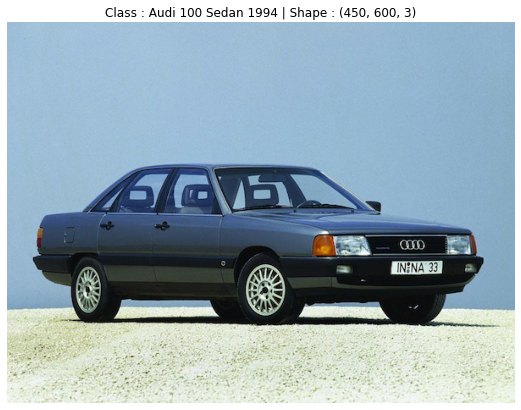

In [8]:
try:
  how_many_imgs = int(input('How many imgs ? ... \n'))
except:
  how_many_imgs = 1
for _ in range(how_many_imgs):
  try:
    train_or_test = random.choice(['train','test'])
    class_name = random.choice(os.listdir('./car_data/car_data/train'))
    random_image = random.choice(os.listdir(f'./car_data/car_data/{train_or_test}/{class_name}'))
    PATH = f'./car_data/car_data/{train_or_test}/{class_name}/{random_image}'
    img = mpimg.imread(PATH)
    img = img / 255.0
    plt.figure(figsize=(10,7))
    plt.imshow(img)
    plt.axis(False)
    plt.title(f'Class : {class_name} | Shape : {img.shape}')
    plt.show();
  except:
    train_or_test = random.choice(['train','test'])
    class_name = random.choice(os.listdir('./car_data/car_data/train'))
    random_image = random.choice(os.listdir(f'./car_data/car_data/{train_or_test}/{class_name}'))
    PATH = f'./car_data/car_data/{train_or_test}/{class_name}/{random_image}'
    img = mpimg.imread(PATH)
    img = img / 255.0
    plt.figure(figsize=(10,7))
    plt.imshow(img)
    plt.axis(False)
    plt.title(f'Class : {class_name} | Shape : {img.shape}')
    plt.show();

# Load the imgs

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.25,height_shift_range=0.25,shear_range=0.25,zoom_range=0.25,validation_split=0.925,horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.0,horizontal_flip=True,vertical_flip=True)
train_data = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(224,224))
train_data_small = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(224,224),subset='training')
test_data = test_datagen.flow_from_directory('./car_data/car_data/test',target_size=(224,224))

Found 34517 images belonging to 196 classes.
Found 2674 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


# Modelling

In [11]:
!pip install wandb --upgrade

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [12]:
import wandb
from wandb.keras import WandbCallback
import tensorflow_hub as hub
PROJECT_NAME = "Stanford-Cars"

## CNN (Custom) vs Transfer Learning (resnet50) vs Classification

### Classification

In [ ]:
import shutil
shutil.rmtree('./car_data/car_data/train/.ipynb_checkpoints')

In [ ]:
test_classes = os.listdir('./car_data/car_data/test/')
train_classes = os.listdir('./car_data/car_data/train/')

In [ ]:
for test_class,train_class in zip(test_classes,train_classes):
  if train_class not in test_classes:
    print(train_class)
  if test_class not in train_classes:
    print(test_class)

In [ ]:
# wandb.init(project=PROJECT_NAME,name='classification-baseline')
# model = tf.keras.Sequential([
#   tf.keras.layers.Flatten(input_shape=(224,224,3)),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(5, activation="relu"),
#   tf.keras.layers.Dense(len(os.listdir('./car_data/car_data/train')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(test_data),epochs=50,callbacks=[WandbCallback()])

### CNN (Custom)

In [ ]:
# wandb.init(project=PROJECT_NAME,name='cnn-baseline')
# model = tf.keras.Sequential([
#   tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(len(os.listdir('./car_data/car_data/train')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(test_data),epochs=50,callbacks=[WandbCallback()])

### Transfer Learning (resnet50)

In [ ]:
# model_url = "https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"
# wandb.init(project=PROJECT_NAME,name='transfer-learning-baseline')
# model = tf.keras.Sequential([
#   hub.KerasLayer(model_url,input_shape=(224,224,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./car_data/car_data/train')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(test_data),epochs=50,callbacks=[WandbCallback()])

Transfer L or CNN or Classificistion ? 

Transfer Learning Won !

### Which Transfer Learning Family is the best ? for my project ? 

In [ ]:
models_to_try = [
    # ['resnet50','https://tfhub.dev/tensorflow/resnet_50/feature_vector/1'],
    # ['resnet_v2_152','https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4'],
    # ['resnet_v1_50','https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/4'],
    # ['resnet_v1_101','https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/4'],
    # ['inception_v3','https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4'],
    # ['mobilenet_v3_large_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5'],
    # ['mobilenet_v3_small_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5'],
    # ['efficentnetb0','https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'],
]

In [ ]:
# for model_to_try in models_to_try:
#   try:
#     print('-'*100)
#     print(model_to_try)
#     print('-'*100)
#     wandb.init(project=PROJECT_NAME,name=f"{model_to_try[0]}-f")
#     model = tf.keras.Sequential([
#       hub.KerasLayer(model_to_try[1],input_shape=(224,224,3),trainable=False),
#       tf.keras.layers.Dense(len(os.listdir('./car_data/car_data/train')),activation='softmax')
#     ])
#     model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
#     model.fit(train_data_small,validation_data=(test_data),epochs=25,callbacks=[WandbCallback(save_model=False)])
#     wandb.finish()
#   except:
#     print('-'*100)
#     print('Didnt work')
#     print(model_to_try)
#     print('Didnt work')
#     print('-'*100)

efficentnetb0 vs resnet50.
if efficentnetb0 wins
  I will look for to use a efficentnet model
elif resnet50 wins
  I will look for to use a resnet model

In [ ]:
resnet50 = 'https://tfhub.dev/tensorflow/resnet_50/feature_vector/1'
efficentnetb0 = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
# wandb.init(project=PROJECT_NAME,name='resnet50')
# model = tf.keras.Sequential([
#   hub.KerasLayer(resnet50,input_shape=(224,224,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./car_data/car_data/train')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data,validation_data=(test_data),epochs=5,callbacks=[WandbCallback()])

In [ ]:
# wandb.init(project=PROJECT_NAME,name='efficentnetb0')
# model = tf.keras.Sequential([
#   hub.KerasLayer(efficentnetb0,input_shape=(224,224,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./car_data/car_data/train')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data,validation_data=(test_data),epochs=5,callbacks=[WandbCallback()])

**efficentnetb0 wins !!!**

### fitting the recommended img sizes

In [ ]:
efficentnetb0 = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'
efficentnetb1 = 'https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1'
efficentnetb2 = 'https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1'
efficentnetb3 = 'https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1'
efficentnetb4 = 'https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1'
efficentnetb5 = 'https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1'
efficentnetb6 = 'https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1'
efficentnetb7 = 'https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1'

In [ ]:
# # efficentnetb0
# train_data = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(224,224))
# train_data_small = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(224,224),subset='training')
# test_data = test_datagen.flow_from_directory('./car_data/car_data/test',target_size=(224,224))
# wandb.init(project=PROJECT_NAME,name='efficentnetb0-efficentnet-f-224-224-3')
# model = tf.keras.Sequential([
#   hub.KerasLayer(efficentnetb0,input_shape=(224,224,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./car_data/car_data/train')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(test_data),epochs=5,callbacks=[WandbCallback()])
# wandb.finish()

In [ ]:
# # efficentnetb1
# train_data = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(240,240))
# train_data_small = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(240,240),subset='training')
# test_data = test_datagen.flow_from_directory('./car_data/car_data/test',target_size=(240,240))
# wandb.init(project=PROJECT_NAME,name='efficentnetb1-efficentnet-f-240-240-3')
# model = tf.keras.Sequential([
#   hub.KerasLayer(efficentnetb1,input_shape=(240,240,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./car_data/car_data/train')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(test_data),epochs=5,callbacks=[WandbCallback(save_model=False)])
# wandb.finish()

In [ ]:
# # efficentnetb2
# train_data = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(260,260))
# train_data_small = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(260,260),subset='training')
# test_data = test_datagen.flow_from_directory('./car_data/car_data/test',target_size=(260,260))
# wandb.init(project=PROJECT_NAME,name='efficentnetb2-efficentnet-f-260-260-3')
# model = tf.keras.Sequential([
#   hub.KerasLayer(efficentnetb2,input_shape=(260,260,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./car_data/car_data/train')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(test_data),epochs=5,callbacks=[WandbCallback(save_model=False)])
# wandb.finish()

In [ ]:
# # efficentnetb3
# train_data = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(300,300))
# train_data_small = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(300,300),subset='training')
# test_data = test_datagen.flow_from_directory('./car_data/car_data/test',target_size=(300,300))
# wandb.init(project=PROJECT_NAME,name='efficentnetb3-efficentnet-f-300-300-3')
# model = tf.keras.Sequential([
#   hub.KerasLayer(efficentnetb3,input_shape=(300,300,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./car_data/car_data/train')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(test_data),epochs=5,callbacks=[WandbCallback(save_model=False)])
# wandb.finish()

In [ ]:
# # efficentnetb4
# train_data = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(380,380))
# train_data_small = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(380,380),subset='training')
# test_data = test_datagen.flow_from_directory('./car_data/car_data/test',target_size=(380,380))
# wandb.init(project=PROJECT_NAME,name='efficentnetb4-efficentnet-f-380-380-3')
# model = tf.keras.Sequential([
#   hub.KerasLayer(efficentnetb4,input_shape=(380,380,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./car_data/car_data/train')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(test_data),epochs=5,callbacks=[WandbCallback(save_model=False)])
# wandb.finish()

In [ ]:
# # efficentnetb5
# train_data = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(456,456))
# train_data_small = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(456,456),subset='training')
# test_data = test_datagen.flow_from_directory('./car_data/car_data/test',target_size=(456,456))
# wandb.init(project=PROJECT_NAME,name='efficentnetb0-efficentnet-f-456-456-3')
# model = tf.keras.Sequential([
#   hub.KerasLayer(efficentnetb5,input_shape=(456,456,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./car_data/car_data/train')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(test_data),epochs=5,callbacks=[WandbCallback(save_model=False)])
# wandb.finish()

In [ ]:
# # efficentnetb6
# train_data = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(528,528))
# train_data_small = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(528,528),subset='training')
# test_data = test_datagen.flow_from_directory('./car_data/car_data/test',target_size=(528,528))
# wandb.init(project=PROJECT_NAME,name='efficentnetb6-efficentnet-f-528-528-3')
# model = tf.keras.Sequential([
#   hub.KerasLayer(efficentnetb6,input_shape=(528,528,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./car_data/car_data/train')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(test_data),epochs=5,callbacks=[WandbCallback(save_model=False)])
# wandb.finish()

In [ ]:
# # efficentnetb7
# train_data = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(600,600))
# train_data_small = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(600,600),subset='training')
# test_data = test_datagen.flow_from_directory('./car_data/car_data/test',target_size=(600,600))
# wandb.init(project=PROJECT_NAME,name='efficentnetb7-efficentnet-f-600-600-3')
# model = tf.keras.Sequential([
#   hub.KerasLayer(efficentnetb7,input_shape=(600,600,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./car_data/car_data/train')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data_small,validation_data=(test_data),epochs=5,callbacks=[WandbCallback(save_model=False)])
# wandb.finish()

In [ ]:
!nvidia-smi

**Result** *:* ...

# train the big dog model

In [14]:
# # efficentnetb5
# train_datagen = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,validation_split=0.925,horizontal_flip=True,vertical_flip=True)
# test_datagen = ImageDataGenerator(rescale=1/255.0,horizontal_flip=True,vertical_flip=True)
# train_data = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(456,456))
# train_data_small = train_datagen.flow_from_directory('./car_data/car_data/train',target_size=(456,456),subset='training')
# test_data = test_datagen.flow_from_directory('./car_data/car_data/test',target_size=(456,456))
# wandb.init(project=PROJECT_NAME,name='big-dog-model')
# model = tf.keras.Sequential([
#   hub.KerasLayer(efficentnetb5,input_shape=(456,456,3),trainable=False),
#   tf.keras.layers.Dense(len(os.listdir('./car_data/car_data/train')),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data,validation_data=(test_data),epochs=10,callbacks=[WandbCallback(),tf.keras.callbacks.EarlyStopping(patience=round(2.5))])
# wandb.finish()
# model.save('./model-0.h5')

# Predicting on real world photos